# Tasks

## Task 6.1: Download the 'Tweets' dataset from Canvas. Classify the sentiments in the dataset using six classifiers and calculate all evaluation metrics.
## NOTE: If the running time is too long, you can reduce the number of samples.
## NOTE: You should comment on your code and explain what each part is doing

In [29]:
############# WRITE THE CODE IN THIS CELL ####################
#import the important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px



In [30]:
#Import the dataset

df = pd.read_csv('C:/Users/Uche Buzz/Desktop/School stuff/Data Mining and Infomatics/Dataset/Tweets.csv')



## Visualise the dataset

In [31]:

df.head(5)


,sentiment,tweet
0,0,Eating a gyro for breakfast at the airport. Pr...
1,1,Well .. .you fall of the 'horse' and get strai...
2,0,thanks for the responses but when is it really...
3,0,depressed.! fuuck my life!
4,1,"is LMAO, just thinkin of the 80/20 rule.....wo..."


In [32]:
df.shape

(40000, 2)

## Drop the null values


In [33]:

df.dropna(inplace = True)

## Extracting the sample we want to use

In [34]:
df = df.sample(n=10000, random_state = 48)
df.reset_index(drop=True, inplace=True)

## Word Cloud


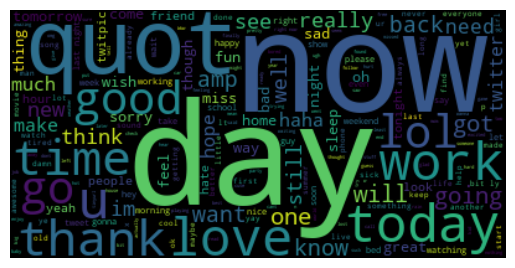

In [35]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from wordcloud import STOPWORDS
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.tweet)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
%matplotlib inline
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
# plt.savefig('wordcloud11.png')
plt.show()

## Assigning reviews 
### Tweet > 1 as **positive sentiment**
### Tweet 0 **negative sentiment** 

In [36]:

# split df - positive and negative sentiment:
positive = df[df['sentiment'] == 1]
negative = df[df['sentiment'] == 0]

In [37]:
df

,sentiment,tweet
0,1,Brad Fastings is my favorite person to hang ou...
1,0,"It's not what you said, it's how you said it!"
2,1,Russell invited me to Drayton Manor on Tuesday...
3,0,@TwitItCherish I don't know if she likes the l...
4,1,"Today = Lazy, maybe a gym session. Tomorrow = ..."
...,...,...
9995,0,@GoCheeksGo harr. subtlety is lost on me toni...
9996,0,I was actually happy to see that leaders of bo...
9997,1,"@turtlescanrun VERY nice pace, esp. in the hea..."
9998,1,Waiting at broadoak-only two more before us!


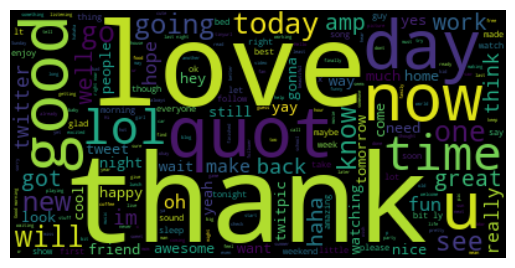

In [38]:
# Word cloud positive
stopwords = set(STOPWORDS)
stopwords.update(["lazy"])
## good and great removed because they were included in negative sentiment
pos = " ".join(review for review in positive.tweet)
wordcloud2 = WordCloud(stopwords=stopwords).generate(pos)
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

In [39]:
negative

,sentiment,tweet
1,0,"It's not what you said, it's how you said it!"
3,0,@TwitItCherish I don't know if she likes the l...
6,0,@hamiltonhadwin It was for the better. You w...
7,0,@br00klynbetty youR noT rude!!! I was PlaYiN!!...
8,0,@BoSSCHiCKStEF I'm mad I hvnt seen u since I b...
...,...,...
9992,0,@crackedknuckles i tried fighting for you but ...
9994,0,4 cigarettes left man i should really give up
9995,0,@GoCheeksGo harr. subtlety is lost on me toni...
9996,0,I was actually happy to see that leaders of bo...


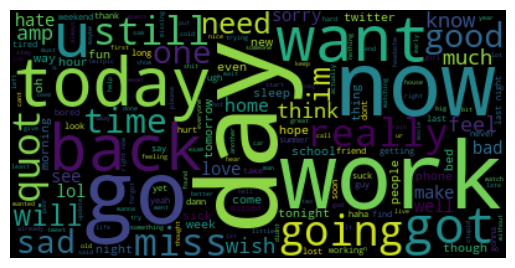

In [40]:
# word cloud negative
neg = "".join(str(review) for review in negative.tweet)
wordcloud3 = WordCloud(stopwords = stopwords).generate(neg)
plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloud33.png')
plt.show()

In [41]:
# review distribution
df['sentimentt'] = df['sentiment'].replace({0 : 'negative'})
df['sentimentt'] = df['sentimentt'].replace({1 : 'positive'})
fig = px.histogram(df, x="sentimentt")
fig.update_traces(marker_color="indianred",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='Product Sentiment')
fig.show(renderer="colab")

In [42]:
# removing punctuation method 1
def remove_punctuation(tweet):
    final = "".join(u for u in tweet if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df['tweet'] = df['tweet'].apply(remove_punctuation)
df = df.dropna(subset=['tweet'])
df['tweet'] = df['tweet'].apply(remove_punctuation)

In [43]:
# Extracting input and output
X =  df['tweet']
# X=df['Text']
y = df['sentiment']

In [44]:
# count vectorizer:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
X = vectorizer.fit_transform(X)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
SVM = svm.SVC()
RF = RandomForestClassifier()
KNN = KNeighborsClassifier()
DT=DecisionTreeClassifier()
NB = GaussianNB()
LR = LogisticRegression()

In [48]:
SVM.fit(X_train, y_train)
RF.fit(X_train, y_train)
KNN.fit(X_train, y_train)
DT.fit(X_train, y_train)
LR.fit(X_train,y_train)
NB.fit(X_train.toarray(),y_train)

GaussianNB()

In [49]:
y_pred1=SVM.predict(X_test)
y_pred2=RF.predict(X_test)
y_pred3=KNN.predict(X_test)
y_pred4=DT.predict(X_test)
y_pred5=LR.predict(X_test)
y_pred6=NB.predict(X_test.toarray())

In [50]:
# This function takes the confusion matrix (cm) from the cell above and produces all evaluation matrix
def confusion_metrics (conf_matrix):

    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    print('True Positives:', TP)
    print('True Negatives:', TN)
    print('False Positives:', FP)
    print('False Negatives:', FN)

    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))

    # calculate mis-classification
    conf_misclassification = 1- conf_accuracy

    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))

    # calculate precision
    conf_precision = (TN / float(TN + FP))
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    print('-'*50)
    print(f'Accuracy: {round(conf_accuracy,2)}')
    print(f'Mis-Classification: {round(conf_misclassification,2)}')
    print(f'Sensitivity: {round(conf_sensitivity,2)}')
    print(f'Specificity: {round(conf_specificity,2)}')
    print(f'Precision: {round(conf_precision,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

Text(0.5, 1.0, 'NB')

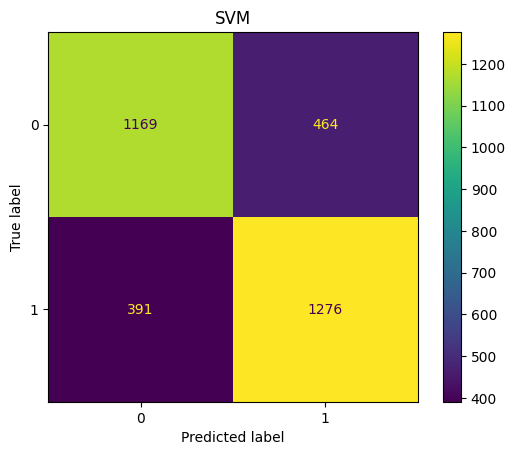

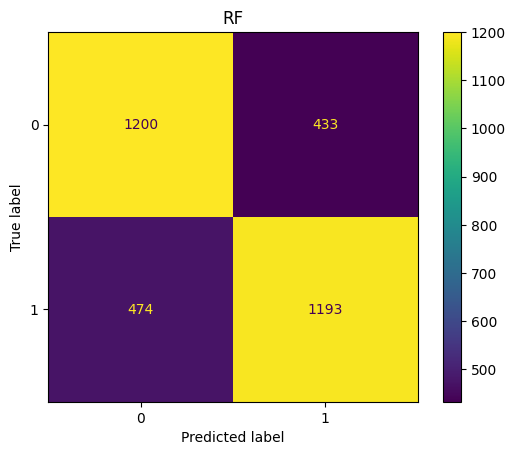

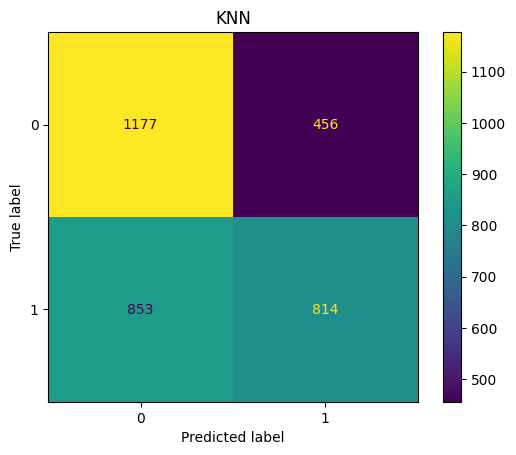

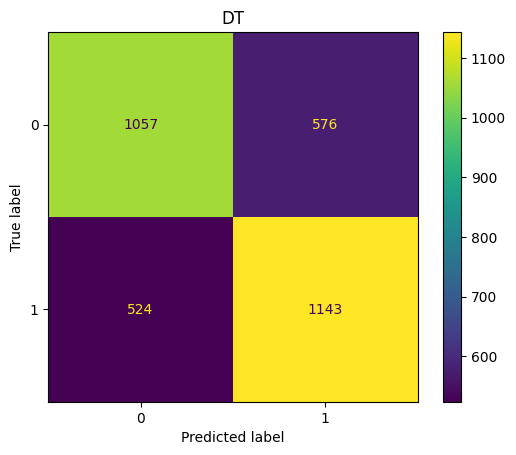

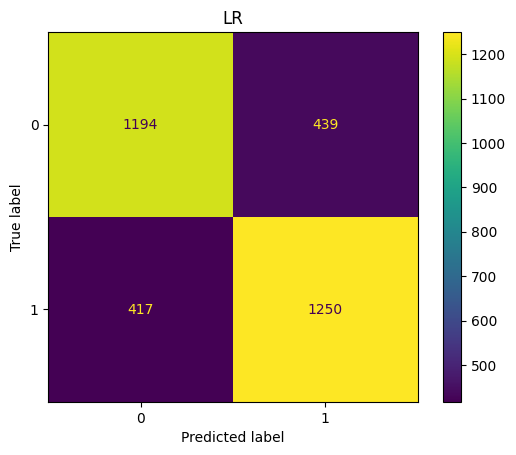

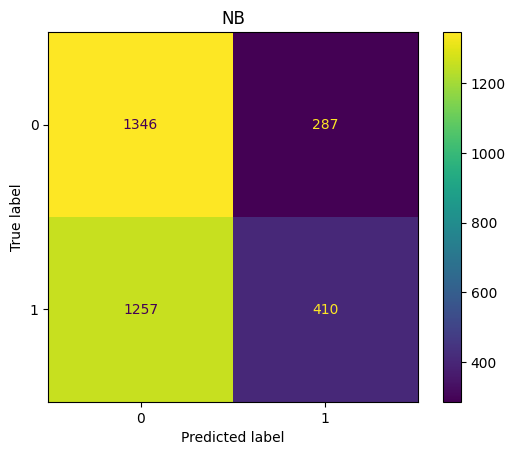

In [51]:
# Creating the confusion matrics for all classifiers' predictions
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm1 = confusion_matrix(y_test, y_pred1, labels=SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=SVM.classes_)
disp.plot()
plt.title("SVM")

cm2 = confusion_matrix(y_test, y_pred2, labels=RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=RF.classes_)
disp.plot()
plt.title("RF")


cm3 = confusion_matrix(y_test, y_pred3, labels=KNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm3,display_labels=KNN.classes_)
disp.plot()
plt.title("KNN")

cm4 = confusion_matrix(y_test, y_pred4, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm4,display_labels=DT.classes_)
disp.plot()
plt.title("DT")

cm5 = confusion_matrix(y_test, y_pred5, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm5,display_labels=DT.classes_)
disp.plot()
plt.title("LR")

cm6 = confusion_matrix(y_test, y_pred6, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm6,display_labels=DT.classes_)
disp.plot()
plt.title("NB")

In [52]:
#printing the evaluation metrics for all classifiers
print('SVM metrics\n')
confusion_metrics(cm1)
print('\n\n')
print('RF metrics\n')
confusion_metrics(cm2)
print('\n\n')
print('KNN metrics\n')
confusion_metrics(cm3)
print('\n\n')
print('DT metrics\n')
confusion_metrics(cm4)
print('\n\n')
print('LR metrics\n')
confusion_metrics(cm5)
print('\n\n')
print('NB metrics\n')
confusion_metrics(cm6)
print('\n\n')

SVM metrics

True Positives: 1276
True Negatives: 1169
False Positives: 464
False Negatives: 391
--------------------------------------------------
Accuracy: 0.74
Mis-Classification: 0.26
Sensitivity: 0.77
Specificity: 0.72
Precision: 0.72
f_1 Score: 0.74



RF metrics

True Positives: 1193
True Negatives: 1200
False Positives: 433
False Negatives: 474
--------------------------------------------------
Accuracy: 0.73
Mis-Classification: 0.27
Sensitivity: 0.72
Specificity: 0.73
Precision: 0.73
f_1 Score: 0.73



KNN metrics

True Positives: 814
True Negatives: 1177
False Positives: 456
False Negatives: 853
--------------------------------------------------
Accuracy: 0.6
Mis-Classification: 0.4
Sensitivity: 0.49
Specificity: 0.72
Precision: 0.72
f_1 Score: 0.58



DT metrics

True Positives: 1143
True Negatives: 1057
False Positives: 576
False Negatives: 524
--------------------------------------------------
Accuracy: 0.67
Mis-Classification: 0.33
Sensitivity: 0.69
Specificity: 0.65
Prec

############ WRITE YOUR REPORT IN THIS CELL (IF APPLICABLE) #############




